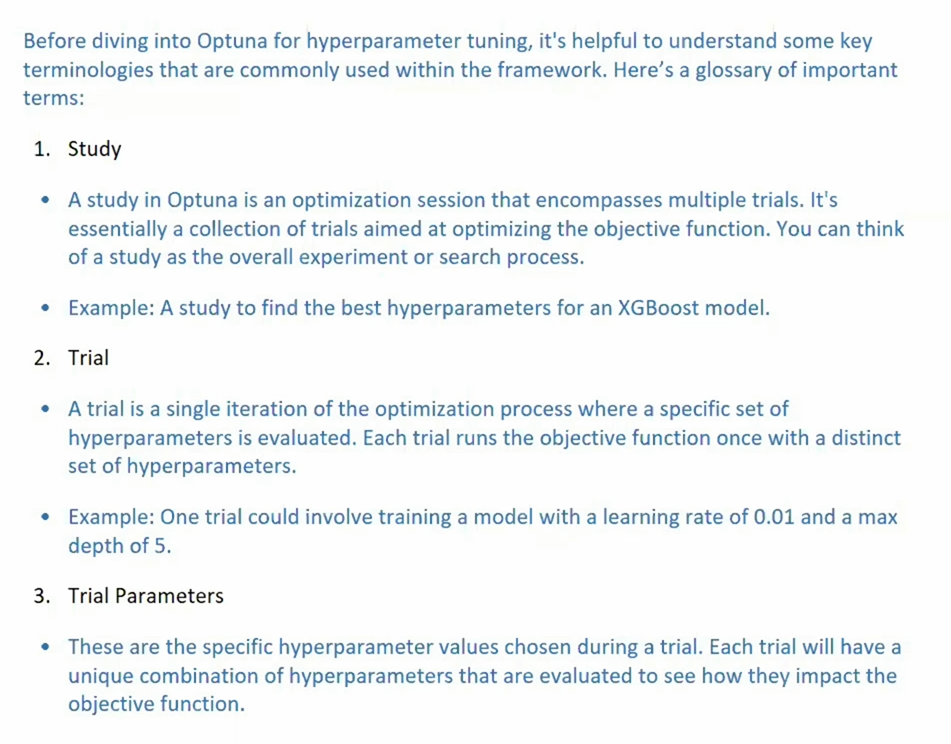
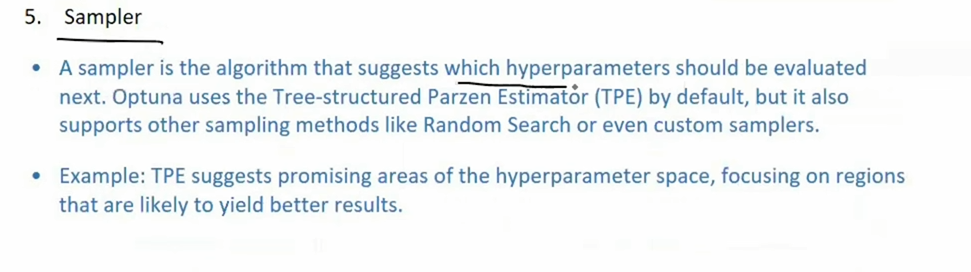

In [1]:
!pip install optuna 

Defaulting to user installation because normal site-packages is not writeable


In [6]:
import optuna
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
import pandas as pd 
import numpy as np


In [5]:
# Load the Pima Indian Diabetes dataset (from UCI repository)
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
           'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Load the dataset
df = pd.read_csv(url, names=columns)

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
cols_with_missing_vals = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_missing_vals] = df[cols_with_missing_vals].replace(np.nan)
df.fillna(df.mean(),inplace = True)

print(df.isna().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15408\2245649761.py:2: FutureWarning: DataFrame.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  df[cols_with_missing_vals] = df[cols_with_missing_vals].replace(np.nan)


In [12]:
X = df.drop('Outcome',axis = 1)
y = df['Outcome']

x_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [13]:
scalar = StandardScaler()
X_train = scalar.fit_transform(x_train)
X_test = scalar.transform(X_test)

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# define the objective function
def objective(trial):
    # suggest values for the hyperparameters
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 3, 20)

    # create the RandomForestClassifier with suggested hyperparameters
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        random_state=42
    )

    # perform cross-validation and calculate accuracy
    score = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy').mean()

    return score  # return the accuracy score for Optuna to maximize

In [16]:
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler())  # We aim to maximize accuracy
study.optimize(objective, n_trials=50)  # Run 50 trials to find the best hyperparameters

[I 2026-01-22 12:32:16,895] A new study created in memory with name: no-name-15f31fb9-aaf1-48bf-883d-717ec75de0d3
[I 2026-01-22 12:32:17,610] Trial 0 finished with value: 0.7508050374621393 and parameters: {'n_estimators': 151, 'max_depth': 4}. Best is trial 0 with value: 0.7508050374621393.
[I 2026-01-22 12:32:18,193] Trial 1 finished with value: 0.7654551251394867 and parameters: {'n_estimators': 123, 'max_depth': 17}. Best is trial 1 with value: 0.7654551251394867.
[I 2026-01-22 12:32:18,656] Trial 2 finished with value: 0.7622190339550454 and parameters: {'n_estimators': 77, 'max_depth': 12}. Best is trial 1 with value: 0.7654551251394867.
[I 2026-01-22 12:32:19,554] Trial 3 finished with value: 0.7687071576598119 and parameters: {'n_estimators': 149, 'max_depth': 13}. Best is trial 3 with value: 0.7687071576598119.
[I 2026-01-22 12:32:20,751] Trial 4 finished with value: 0.7670731707317073 and parameters: {'n_estimators': 173, 'max_depth': 16}. Best is trial 3 with value: 0.768707

In [17]:
# Print the best result
print(f'Best trial accuracy: {study.best_trial.value}')
print(f'Best hyperparameters: {study.best_trial.params}')

Best trial accuracy: 0.7817232584090547
Best hyperparameters: {'n_estimators': 129, 'max_depth': 8}


In [18]:
from sklearn.metrics import accuracy_score

# train a RandomForestClassifier using the best hyperparameters from Optuna
best_model = RandomForestClassifier(**study.best_trial.params, random_state=42)

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print(f'test accuracy with best hyperparameters: {test_accuracy:.2f}')


test accuracy with best hyperparameters: 0.73


In [ ]:
# samplers tpe -> byesian optimization 
# sampler randomsearch , gridsearch

In [19]:
search_space = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [5, 10, 15, 20]
}

In [20]:
study = optuna.study.create_study(direction='maximize',sampler=optuna.samplers.GridSampler(search_space))
study.optimize(objective)


[I 2026-01-22 12:38:06,625] A new study created in memory with name: no-name-62874175-ee8e-4d41-9cfc-0665dad276b5
[I 2026-01-22 12:38:07,015] Trial 0 finished with value: 0.7654391838036028 and parameters: {'n_estimators': 100, 'max_depth': 5}. Best is trial 0 with value: 0.7654391838036028.
[I 2026-01-22 12:38:07,622] Trial 1 finished with value: 0.7670811413996493 and parameters: {'n_estimators': 150, 'max_depth': 10}. Best is trial 1 with value: 0.7670811413996493.
[I 2026-01-22 12:38:07,837] Trial 2 finished with value: 0.7654391838036028 and parameters: {'n_estimators': 50, 'max_depth': 15}. Best is trial 1 with value: 0.7670811413996493.
[I 2026-01-22 12:38:08,248] Trial 3 finished with value: 0.7638131675434402 and parameters: {'n_estimators': 100, 'max_depth': 15}. Best is trial 1 with value: 0.7670811413996493.
[I 2026-01-22 12:38:08,727] Trial 4 finished with value: 0.7638131675434402 and parameters: {'n_estimators': 100, 'max_depth': 20}. Best is trial 1 with value: 0.767081

In [21]:
print(f'Best trial accuracy: {study.best_trial.value}')
print(f'Best hyperparameters: {study.best_trial.params}')

Best trial accuracy: 0.7687071576598119
Best hyperparameters: {'n_estimators': 200, 'max_depth': 20}


In [22]:
best_model = RandomForestClassifier(**study.best_trial.params,random_state=42)
best_model.fit(X_train,y_train)
prediction = best_model.predict(X_test)
accuracy = accuracy_score(y_test,prediction)
print(accuracy)

0.7337662337662337


In [35]:
# For visualizations

import plotly.io as pio
pio.renderers.default = "browser"


from optuna.visualization import plot_optimization_history, plot_parallel_coordinate, plot_slice, plot_contour, plot_param_importances

In [36]:
# optimization history
plot_optimization_history(study).show()

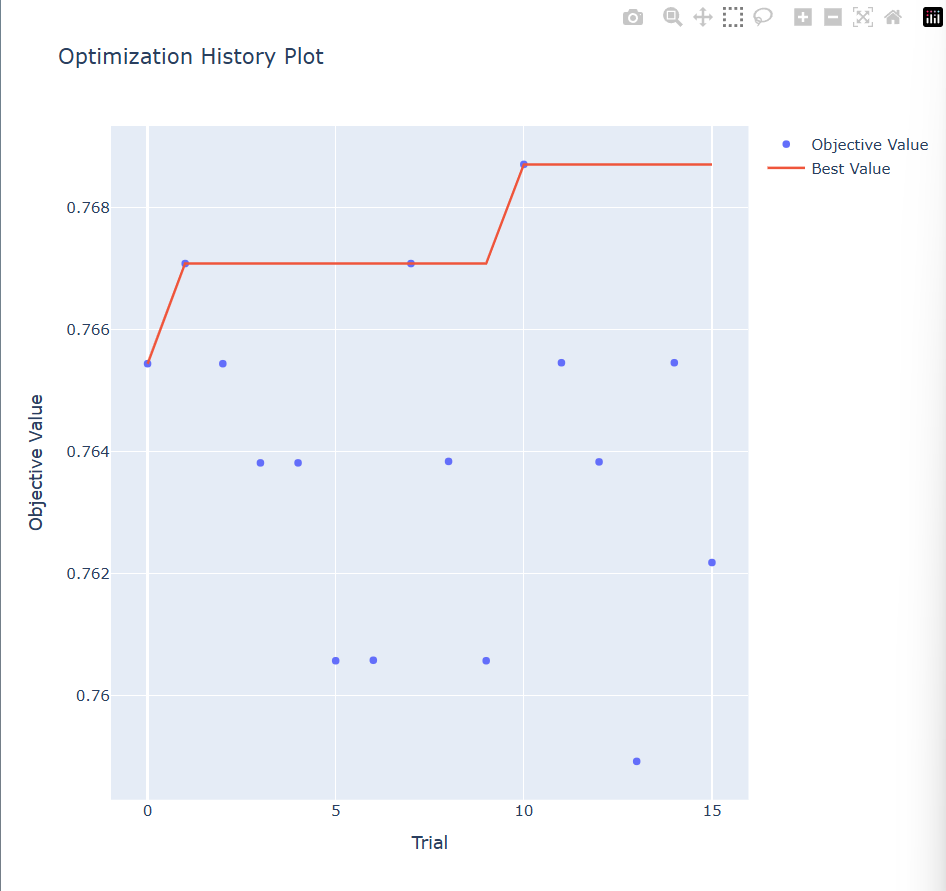

In [37]:
# Parallel Coordinates Plot
plot_parallel_coordinate(study).show()

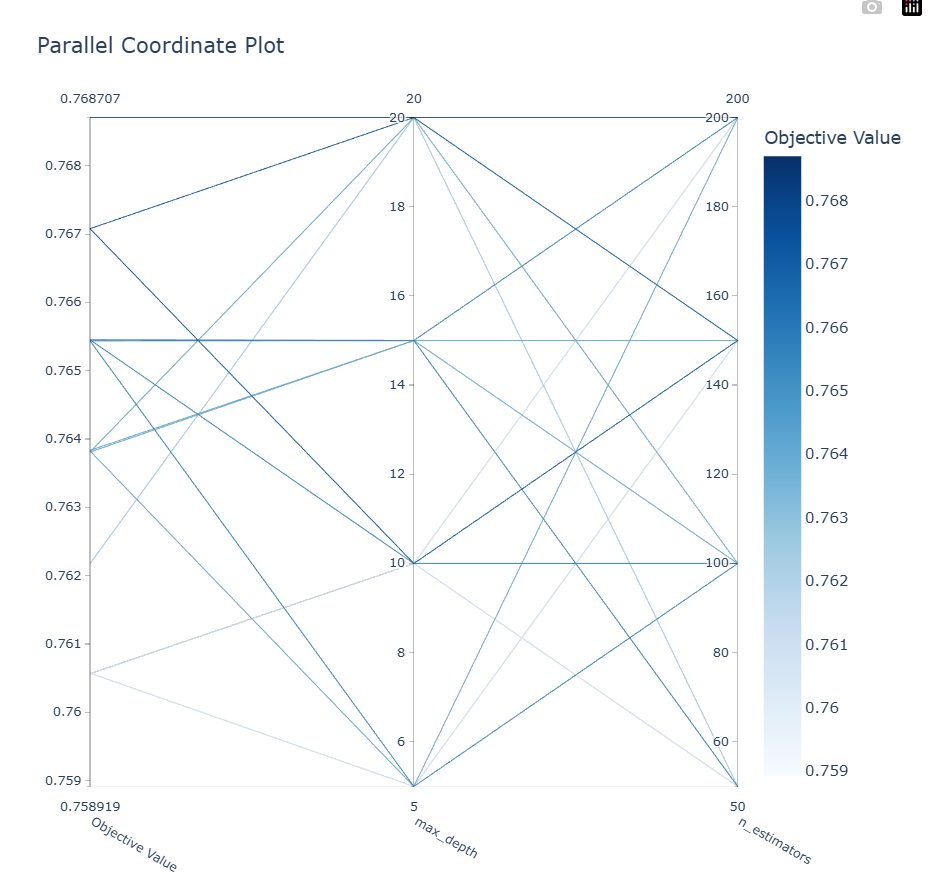

In [38]:
#  Slice Plot
plot_slice(study).show()

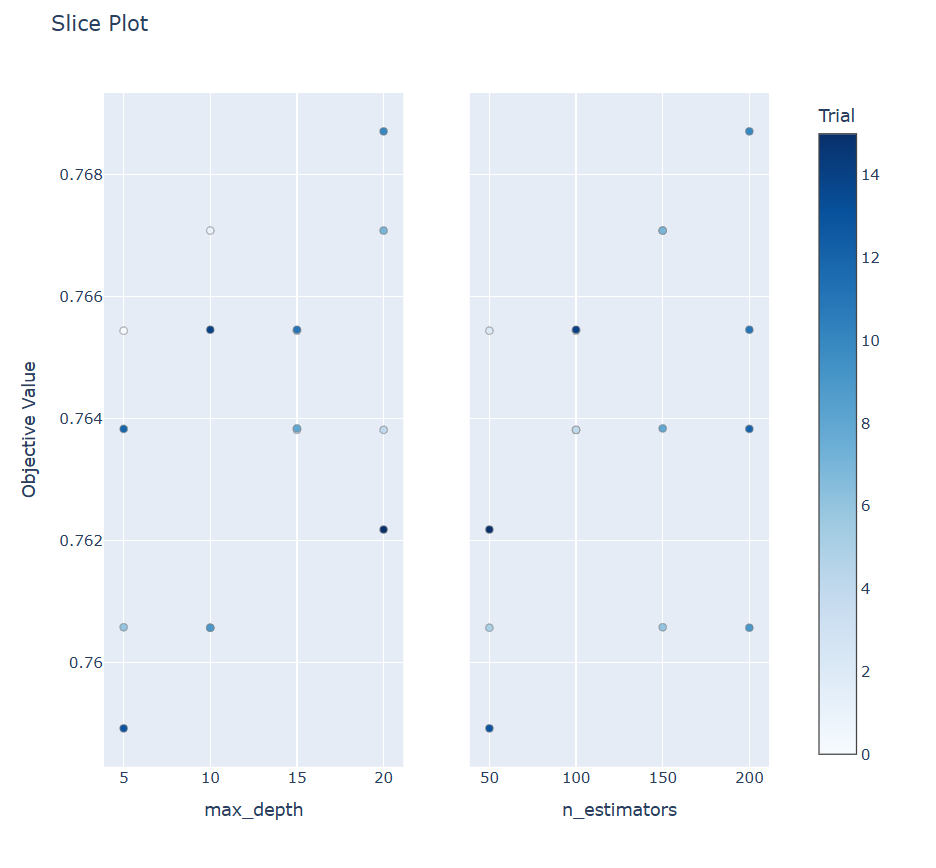

In [39]:
# 4. Contour Plot
plot_contour(study).show()

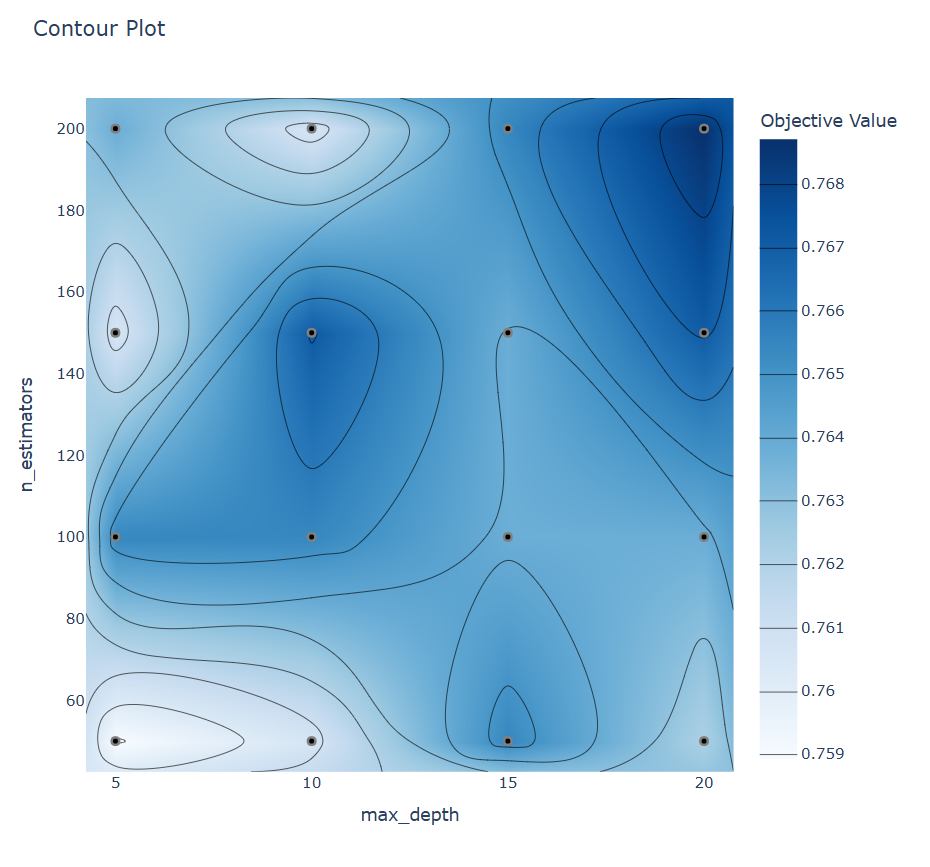

In [41]:
#  hyperparameter importance
plot_param_importances(study).show()

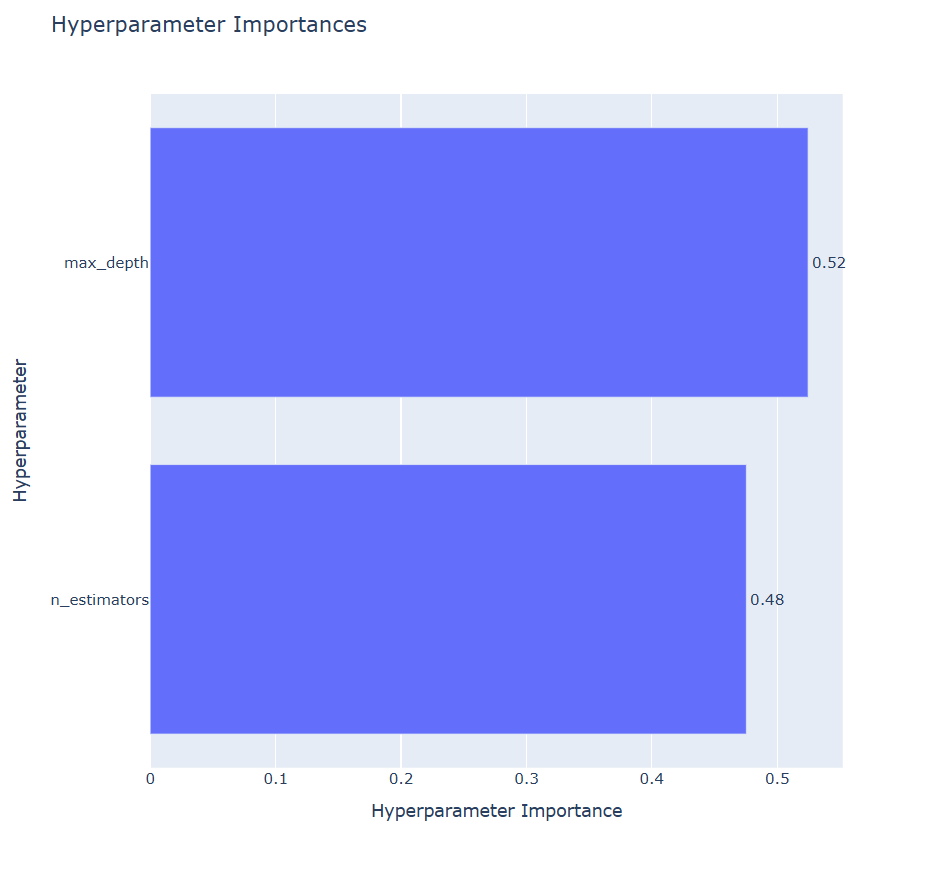

In [42]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [43]:
# define the objective function for Optuna
def objective(trial):
    # choose the algorithm to tune
    classifier_name = trial.suggest_categorical('classifier', ['SVM', 'RandomForest', 'GradientBoosting'])

    if classifier_name == 'SVM':
        # SVM hyperparameters
        c = trial.suggest_float('C', 0.1, 100, log=True)
        kernel = trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly', 'sigmoid'])
        gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])

        model = SVC(C=c, kernel=kernel, gamma=gamma, random_state=42)

    elif classifier_name == 'RandomForest':
        # Random Forest hyperparameters
        n_estimators = trial.suggest_int('n_estimators', 50, 300)
        max_depth = trial.suggest_int('max_depth', 3, 20)
        min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
        bootstrap = trial.suggest_categorical('bootstrap', [True, False])

        model = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            bootstrap=bootstrap,
            random_state=42
        )

    elif classifier_name == 'GradientBoosting':
        # Gradient Boosting hyperparameters
        n_estimators = trial.suggest_int('n_estimators', 50, 300)
        learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3, log=True)
        max_depth = trial.suggest_int('max_depth', 3, 20)
        min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)

        model = GradientBoostingClassifier(
            n_estimators=n_estimators,
            learning_rate=learning_rate,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            random_state=42
        )

    # perform cross-validation and return the mean accuracy
    score = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy').mean()
    return score

In [44]:
# Create a study and optimize it using CmaEsSampler
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2026-01-22 12:53:35,772] A new study created in memory with name: no-name-e3b8cd9c-914b-47b2-9935-0fe7ade98627
[I 2026-01-22 12:53:37,434] Trial 0 finished with value: 0.7654232424677189 and parameters: {'classifier': 'GradientBoosting', 'n_estimators': 134, 'learning_rate': 0.017485619584055218, 'max_depth': 13, 'min_samples_split': 10, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.7654232424677189.
[I 2026-01-22 12:53:37,643] Trial 1 finished with value: 0.7866092778574845 and parameters: {'classifier': 'RandomForest', 'n_estimators': 63, 'max_depth': 7, 'min_samples_split': 7, 'min_samples_leaf': 2, 'bootstrap': False}. Best is trial 1 with value: 0.7866092778574845.
[I 2026-01-22 12:53:38,670] Trial 2 finished with value: 0.7833572453371592 and parameters: {'classifier': 'RandomForest', 'n_estimators': 204, 'max_depth': 11, 'min_samples_split': 9, 'min_samples_leaf': 4, 'bootstrap': False}. Best is trial 1 with value: 0.7866092778574845.
[I 2026-01-22 12:53:38,806] Trial

In [45]:
# Retrieve the best trial
best_trial = study.best_trial
print("Best trial parameters:", best_trial.params)
print("Best trial accuracy:", best_trial.value)

Best trial parameters: {'classifier': 'RandomForest', 'n_estimators': 72, 'max_depth': 9, 'min_samples_split': 6, 'min_samples_leaf': 3, 'bootstrap': False}
Best trial accuracy: 0.7866172485254265


In [46]:
study.trials_dataframe()


,number,value,datetime_start,datetime_complete,duration,params_C,params_bootstrap,params_classifier,params_gamma,params_kernel,params_learning_rate,params_max_depth,params_min_samples_leaf,params_min_samples_split,params_n_estimators,state
0,0,0.765423,2026-01-22 12:53:35.773195,2026-01-22 12:53:37.434660,0 days 00:00:01.661465,NaN,NaN,GradientBoosting,NaN,NaN,0.017486,13.0,6.0,10.0,134.0,COMPLETE
1,1,0.786609,2026-01-22 12:53:37.435864,2026-01-22 12:53:37.643879,0 days 00:00:00.208015,NaN,False,RandomForest,NaN,NaN,NaN,7.0,2.0,7.0,63.0,COMPLETE
2,2,0.783357,2026-01-22 12:53:37.644544,2026-01-22 12:53:38.670694,0 days 00:00:01.026150,NaN,False,RandomForest,NaN,NaN,NaN,11.0,4.0,9.0,204.0,COMPLETE
3,3,0.731261,2026-01-22 12:53:38.673285,2026-01-22 12:53:38.805929,0 days 00:00:00.132644,31.784786,NaN,SVM,auto,rbf,NaN,NaN,NaN,NaN,NaN,COMPLETE
4,4,0.710115,2026-01-22 12:53:38.808420,2026-01-22 12:53:38.853997,0 days 00:00:00.045577,0.110261,NaN,SVM,scale,poly,NaN,NaN,NaN,NaN,NaN,COMPLETE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,0.780081,2026-01-22 12:54:56.180809,2026-01-22 12:54:57.619638,0 days 00:00:01.438829,NaN,False,RandomForest,NaN,NaN,NaN,10.0,3.0,10.0,211.0,COMPLETE
96,96,0.780105,2026-01-22 12:54:57.620486,2026-01-22 12:54:58.950701,0 days 00:00:01.330215,NaN,False,RandomForest,NaN,NaN,NaN,14.0,4.0,7.0,215.0,COMPLETE
97,97,0.773569,2026-01-22 12:54:58.951453,2026-01-22 12:54:59.371609,0 days 00:00:00.420156,NaN,False,RandomForest,NaN,NaN,NaN,8.0,5.0,8.0,72.0,COMPLETE
98,98,0.781715,2026-01-22 12:54:59.372558,2026-01-22 12:55:00.255206,0 days 00:00:00.882648,NaN,False,RandomForest,NaN,NaN,NaN,13.0,1.0,10.0,186.0,COMPLETE


In [47]:
study.trials_dataframe()['params_classifier'].value_counts()

params_classifier
RandomForest        79
GradientBoosting    11
SVM                 10
Name: count, dtype: int64

In [ ]:
import optuna
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import numpy as np

# Load the Iris dataset
X, y = load_iris(return_X_y=True)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the objective function for XGBoost
def objective(trial):
    # Hyperparameter search space
    param = {
        'verbosity': 0,
        'objective': 'multi:softprob',
        'num_class': 3,
        'eval_metric': 'mlogloss',  # Ensure that the eval_metric is specified here
        'booster': 'gbtree',
        'lambda': trial.suggest_float('lambda', 1e-8, 1.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-8, 1.0, log=True),
        'eta': trial.suggest_float('eta', 0.01, 0.3),
        'gamma': trial.suggest_float('gamma', 1e-8, 1.0, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 9),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'n_estimators': 300,
    }

    # Create DMatrix for XGBoost
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)

    # Define a pruning callback based on evaluation metrics
    pruning_callback = optuna.integration.XGBoostPruningCallback(trial, "eval-mlogloss")  # Match the metric name in the evals list

    # Train the model
    bst = xgb.train(
        param,
        dtrain,
        num_boost_round=300,
        evals=[(dtrain, "train"), (dtest, "eval")],  # Ensure the eval datasets and names are specified
        early_stopping_rounds=30,
        callbacks=[pruning_callback]
    )

    # Predict on the test set
    preds = bst.predict(dtest)
    best_preds = [int(np.argmax(line)) for line in preds]

    # Return accuracy as the objective value
    accuracy = accuracy_score(y_test, best_preds)
    return accuracy

# Create a study with pruning
study = optuna.create_study(direction='maximize', pruner=optuna.pruners.SuccessiveHalvingPruner())
study.optimize(objective, n_trials=50)

# Output the best trial
print(f"Best trial: {study.best_trial.params}")
print(f"Best accuracy: {study.best_value}")
